In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns
print(glob.glob("results/*_fp16.csv"))

['results/all_kmeans_d2hs_fp16.csv', 'results/mp_kmeans_d2_iter_fp16.csv', 'results/all_kmeans_d2_inertia_fp16.csv', 'results/mp_kmeans_d2cs_fp16.csv', 'results/all_kmeans_d2_iter_fp16.csv', 'results/mp_kmeans_d2vm_fp16.csv', 'results/mp_kmeans_d2hs_fp16.csv', 'results/all_kmeans_d2vm_fp16.csv', 'results/all_kmeans_d2cs_fp16.csv', 'results/mp_kmeans_d2_inertia_fp16.csv']


In [2]:
all_low_inertia_fp16 = pd.read_csv('results/all_kmeans_d2_inertia_fp16.csv')
mp_low_inertia_fp16 = pd.read_csv('results/mp_kmeans_d2_inertia_fp16.csv')
native_inertia = pd.read_csv('results/native_kmeans_d2_inertia.csv')

all_low_inertia_fp32 = pd.read_csv('results/all_kmeans_d2_inertia_fp32.csv')
mp_low_inertia_fp32 = pd.read_csv('results/mp_kmeans_d2_inertia_fp32.csv')

In [3]:
all_low_vm_fp16 = pd.read_csv('results/all_kmeans_d2vm_fp16.csv')
mp_low_vm_fp16 = pd.read_csv('results/mp_kmeans_d2vm_fp16.csv')
native_vm = pd.read_csv('results/native_kmeans_d2vm.csv')

all_low_vm_fp32 = pd.read_csv('results/all_kmeans_d2vm_fp32.csv')
mp_low_vm_fp32 = pd.read_csv('results/mp_kmeans_d2vm_fp32.csv')

In [4]:
all_low_iter_fp16 = pd.read_csv('results/all_kmeans_d2_iter_fp16.csv')
mp_low_iter_fp16 = pd.read_csv('results/mp_kmeans_d2_iter_fp16.csv')
native_iter = pd.read_csv('results/native_kmeans_d2_iter.csv')

all_low_iter_fp32 = pd.read_csv('results/all_kmeans_d2_iter_fp32.csv')
mp_low_iter_fp32 = pd.read_csv('results/mp_kmeans_d2_iter_fp32.csv')

In [5]:
native_iter

,Unnamed: 0,10,25,50,75
0,2,8.0,13.000000,22.000000,18.666667
1,10,1.0,1.000000,9.000000,6.666667
2,20,1.0,4.333333,5.000000,3.333333
3,40,1.0,1.000000,1.333333,3.333333
4,60,1.0,1.000000,1.000000,1.666667


In [6]:
mp_low_iter_fp16

,Unnamed: 0,10,25,50,75
0,2,9.0,20.333333,21.333333,49.333333
1,10,1.0,1.000000,4.333333,6.333333
2,20,1.0,7.000000,2.000000,3.000000
3,40,1.0,1.000000,2.333333,2.333333
4,60,1.0,1.000000,1.000000,1.666667


In [7]:
all_low_iter_fp16

,Unnamed: 0,10,25,50,75
0,2,10.0,22.333333,54.666667,63.000000
1,10,1.0,1.000000,6.000000,6.333333
2,20,1.0,5.666667,3.666667,3.000000
3,40,1.0,1.000000,4.333333,5.333333
4,60,1.0,1.000000,1.000000,2.000000


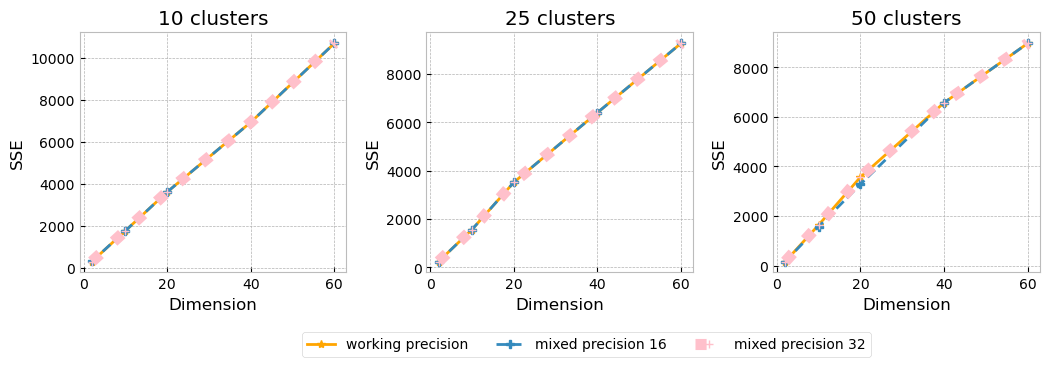

In [8]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
# fig.suptitle('')
ax1.plot(native_inertia['Unnamed: 0'], native_inertia['10'], label='working precision', marker='*', linestyle='-', c='orange')
ax1.plot(native_inertia['Unnamed: 0'], mp_low_inertia_fp16['10'], label='mixed precision 16', marker='P', linestyle='--')
ax1.plot(native_inertia['Unnamed: 0'], mp_low_inertia_fp32['10'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8, c='pink')
ax1.set_xlabel("Dimension")
ax1.set_ylabel("SSE")

ax1.title.set_text("10 clusters")
ax2.plot(native_inertia['Unnamed: 0'], native_inertia['25'], label='working precision', marker='*', linestyle='-', c='orange')
ax2.plot(native_inertia['Unnamed: 0'], mp_low_inertia_fp16['25'], label='mixed precision 16', marker='P', linestyle='--')
ax2.plot(native_inertia['Unnamed: 0'], mp_low_inertia_fp32['25'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8, c='pink')
ax2.set_xlabel("Dimension")
ax2.set_ylabel("SSE")

ax2.title.set_text("25 clusters")
ax3.plot(native_inertia['Unnamed: 0'], native_inertia['50'], label='working precision', marker='*', linestyle='-', c='orange')
ax3.plot(native_inertia['Unnamed: 0'], mp_low_inertia_fp16['50'], label='mixed precision 16', marker='P', linestyle='--')
ax3.plot(native_inertia['Unnamed: 0'], mp_low_inertia_fp32['50'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8, c='pink')
ax3.title.set_text("50 clusters")
ax3.set_xlabel("Dimension")
ax3.set_ylabel("SSE")
plt.legend(loc='center', ncol=3, bbox_to_anchor=(-0.7, -0.3, 0, 0))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.2)

plt.savefig('results/inertia.pdf', bbox_inches='tight')
plt.show()

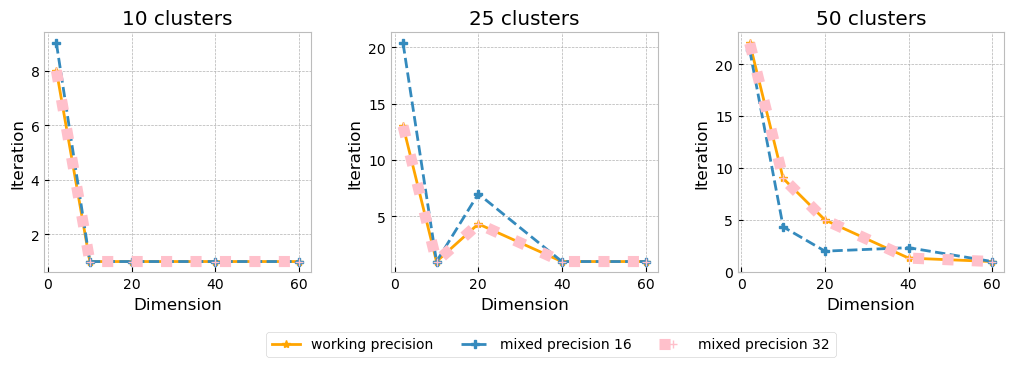

In [9]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
# fig.suptitle('')
ax1.plot(native_inertia['Unnamed: 0'], native_iter['10'], label='working precision', marker='*', linestyle='-', c='orange')
ax1.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp16['10'], label='mixed precision 16', marker='P', linestyle='--')
ax1.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp32['10'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8, c='pink')
ax1.set_xlabel("Dimension")
ax1.set_ylabel("Iteration")
ax1.title.set_text("10 clusters")
ax2.plot(native_inertia['Unnamed: 0'], native_iter['25'], label='working precision', marker='*', linestyle='-', c='orange')
ax2.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp16['25'], label='mixed precision 16', marker='P', linestyle='--')
ax2.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp32['25'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8,c='pink')
ax2.set_xlabel("Dimension")
ax2.set_ylabel("Iteration")
ax2.title.set_text("25 clusters")
ax3.plot(native_inertia['Unnamed: 0'], native_iter['50'], label='working precision', marker='*', linestyle='-', c='orange')
ax3.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp16['50'], label='mixed precision 16', marker='P', linestyle='--')
ax3.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp32['50'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8,c='pink')
ax3.title.set_text("50 clusters")
ax3.set_xlabel("Dimension")
ax3.set_ylabel("Iteration")
plt.legend(loc='center', ncol=3, bbox_to_anchor=(-0.7, -0.3, 0, 0))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.2)

plt.savefig('results/iter.pdf', bbox_inches='tight')
plt.show()

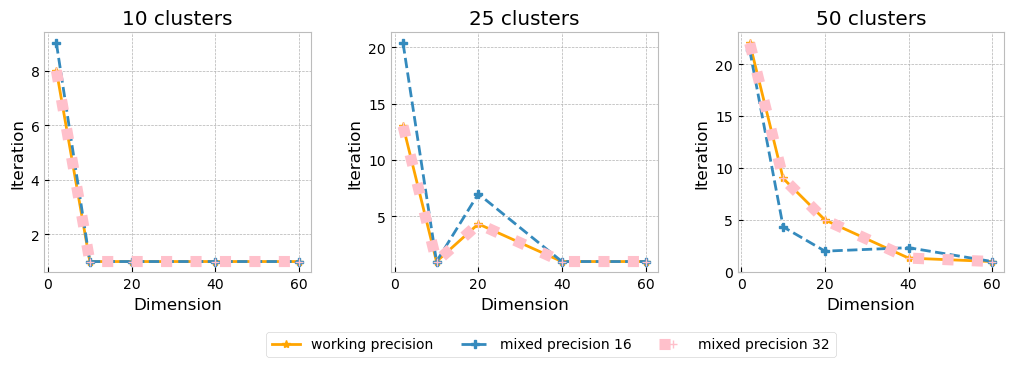

In [10]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
# fig.suptitle('')
ax1.plot(native_inertia['Unnamed: 0'], native_iter['10'], label='working precision', marker='*', linestyle='-', c='orange')
ax1.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp16['10'], label='mixed precision 16', marker='P', linestyle='--')
ax1.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp32['10'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8, c='pink')
ax1.set_xlabel("Dimension")
ax1.set_ylabel("Iteration")
ax1.title.set_text("10 clusters")
ax2.plot(native_inertia['Unnamed: 0'], native_iter['25'], label='working precision', marker='*', linestyle='-', c='orange')
ax2.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp16['25'], label='mixed precision 16', marker='P', linestyle='--')
ax2.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp32['25'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8, c='pink')
ax2.set_xlabel("Dimension")
ax2.set_ylabel("Iteration")
ax2.title.set_text("25 clusters")
ax3.plot(native_inertia['Unnamed: 0'], native_iter['50'], label='working precision', marker='*', linestyle='-', c='orange')
ax3.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp16['50'], label='mixed precision 16', marker='P', linestyle='--')
ax3.plot(native_inertia['Unnamed: 0'], mp_low_iter_fp32['50'], label='mixed precision 32', marker='+', linestyle=':', linewidth=8, c='pink')
ax3.title.set_text("50 clusters")
ax3.set_xlabel("Dimension")
ax3.set_ylabel("Iteration")
plt.legend(loc='center', ncol=3, bbox_to_anchor=(-0.7, -0.3, 0, 0))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.2)

plt.savefig('results/iter.pdf', bbox_inches='tight')
plt.show()

In [7]:
all_low_iter_fp16 = pd.read_csv('results/all_kmeans_d2_iter_fp16.csv')
mp_low_iter_fp16 = pd.read_csv('results/mp_kmeans_d2_iter_fp16.csv')
native_iter_fp16 = pd.read_csv('results/native_kmeans_d2_iter.csv')

In [8]:
all_low_iter_fp16

,Unnamed: 0,10,25,50
0,2,28.333333,99.0,99.000000
1,10,1.000000,1.0,6.333333
2,20,1.000000,1.0,4.333333
3,40,1.000000,1.0,4.333333
4,60,1.000000,1.0,5.666667


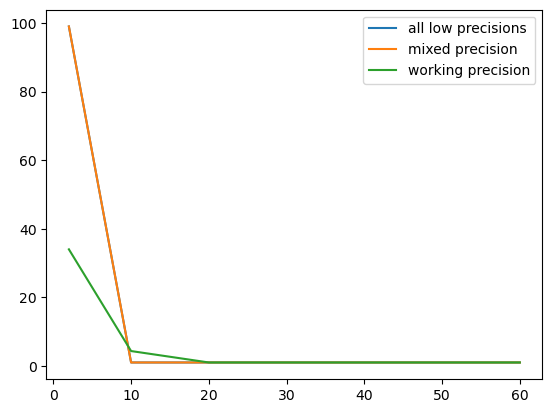

In [9]:
plt.plot(all_low_iter_fp16['Unnamed: 0'], all_low_iter_fp16['25'], label='all low precisions')
plt.plot(mp_low_iter_fp16['Unnamed: 0'], mp_low_iter_fp16['25'], label='mixed precision')
plt.plot(native_iter_fp16['Unnamed: 0'], native_iter_fp16['25'], label='working precision')
plt.legend()

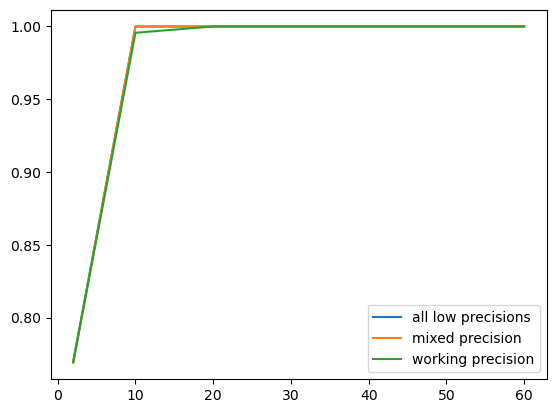

In [3]:
plt.plot(all_low_inertia_fp16['Unnamed: 0'], all_low_inertia_fp16['25'], label='all low precisions')
plt.plot(mp_low_inertia_fp16['Unnamed: 0'], mp_low_inertia_fp16['25'], label='mixed precision')
plt.plot(native_inertia_fp16['Unnamed: 0'], native_inertia_fp16['25'], label='working precision')
plt.legend()

In [5]:
all_low_inertia_fp32 = pd.read_csv('results/all_kmeans_d2vm_fp32.csv')
mp_low_inertia_fp32 = pd.read_csv('results/mp_kmeans_d2vm_fp32.csv')
native_inertia_fp32 = pd.read_csv('results/native_kmeans_d2vm.csv')

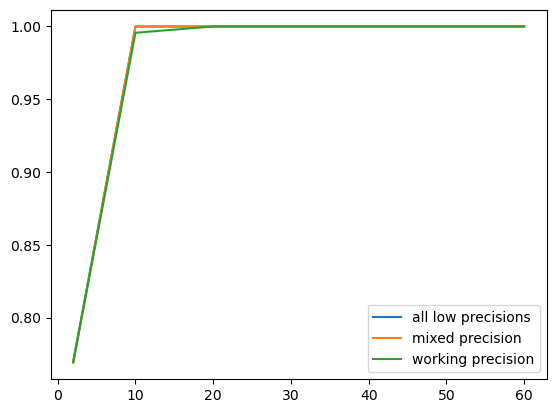

In [6]:
plt.plot(all_low_inertia_fp32['Unnamed: 0'], all_low_inertia_fp16['25'], label='all low precisions')
plt.plot(mp_low_inertia_fp32['Unnamed: 0'], mp_low_inertia_fp16['25'], label='mixed precision')
plt.plot(native_inertia_fp32['Unnamed: 0'], native_inertia_fp16['25'], label='working precision')
plt.legend()